In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5
import numpy as np

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
simpsons_ts = pd.read_csv('Simpsons_dataset/simpsons_sentiment_time_series.csv')
news_ts = pd.read_csv('news_dataset/news_time_series.csv', header=None)

In [3]:
simpsons_ts.head()

,original_air_date,sentiment
0,1989-12-17,0.053433
1,1990-01-14,0.039456
2,1990-01-21,0.078387
3,1990-01-28,0.070182
4,1990-02-04,0.069809


In [4]:
simpsons_ts = simpsons_ts.set_index('original_air_date')

In [5]:
simpsons_ts.index = pd.DatetimeIndex(simpsons_ts.index)

In [6]:
simpsons_ts = simpsons_ts.groupby(pd.Grouper(freq='M')).aggregate(np.average)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


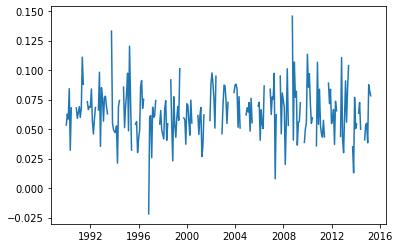

In [7]:
plt.plot(simpsons_ts)

In [8]:
missing_values = np.argwhere(np.isnan(simpsons_ts['sentiment']))
not_missing = np.argwhere(~np.isnan(simpsons_ts['sentiment']))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [9]:
train_x = not_missing
predict_x = missing_values
y = simpsons_ts['sentiment']
train_y  = y[train_x]

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(train_x)
pol_reg = LinearRegression()
pol_reg.fit(train_x, train_y)

predicted_y = pol_reg.predict(predict_x)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

In [11]:
y[missing_values] =  predicted_y

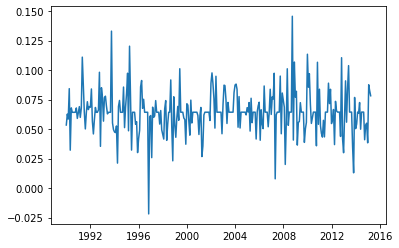

In [12]:
plt.plot(y)

In [13]:
news_ts.columns

Int64Index([0, 1], dtype='int64')

In [14]:
news_ts = news_ts.set_index(pd.to_datetime(news_ts[0]))

In [15]:
news_ts = news_ts.sort_index()

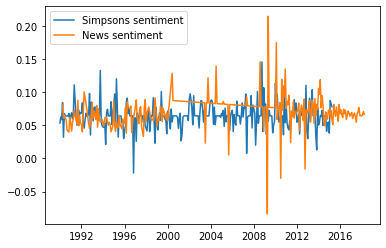

In [16]:
plt.plot(y, label="Simpsons sentiment")
plt.plot(news_ts.index, news_ts[1], label="News sentiment")
plt.legend()
plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
freq = 31

In [19]:
news_ts[1].index

DatetimeIndex(['1990-03-31 00:00:00+00:00', '1990-04-30 00:00:00+00:00',
               '1990-05-31 00:00:00+00:00', '1990-06-30 00:00:00+00:00',
               '1990-07-31 00:00:00+00:00', '1990-08-31 00:00:00+00:00',
               '1990-10-31 00:00:00+00:00', '1990-11-30 00:00:00+00:00',
               '1990-12-31 00:00:00+00:00', '1991-01-31 00:00:00+00:00',
               ...
               '2017-06-30 00:00:00+00:00', '2017-07-31 00:00:00+00:00',
               '2017-08-31 00:00:00+00:00', '2017-09-30 00:00:00+00:00',
               '2017-10-31 00:00:00+00:00', '2017-11-30 00:00:00+00:00',
               '2017-12-31 00:00:00+00:00', '2018-01-31 00:00:00+00:00',
               '2018-02-28 00:00:00+00:00', '2018-03-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name=0, length=315, freq=None)

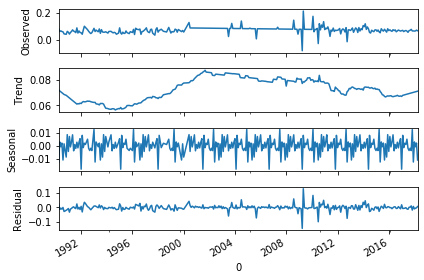

In [20]:
additive_decomposition = seasonal_decompose(news_ts[1], model='additive', extrapolate_trend=1, freq=freq)
additive_decomposition.plot()
plt.show()

In [21]:
news_trend = additive_decomposition.trend
news_trend

0
1990-03-31 00:00:00+00:00    0.071942
1990-04-30 00:00:00+00:00    0.071260
1990-05-31 00:00:00+00:00    0.070579
1990-06-30 00:00:00+00:00    0.069897
1990-07-31 00:00:00+00:00    0.069215
                               ...   
2017-11-30 00:00:00+00:00    0.070154
2017-12-31 00:00:00+00:00    0.070386
2018-01-31 00:00:00+00:00    0.070617
2018-02-28 00:00:00+00:00    0.070849
2018-03-31 00:00:00+00:00    0.071081
Name: 1, Length: 315, dtype: float64

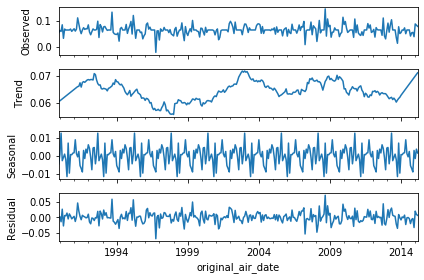

In [22]:
additive_decomposition = seasonal_decompose(y, model='additive', extrapolate_trend=1, freq=freq)
additive_decomposition.plot()
simpsons_trend = additive_decomposition.trend
plt.show()

In [23]:
merged = pd.merge_asof(news_trend, simpsons_trend, left_index=True, right_index=True, direction='nearest')
score = merged.corr()['sentiment'][1]
score

0.14244534870265507

In [39]:
import statsmodels.api as sm

mod = sm.OLS(merged.iloc[:, 0], merged.iloc[:, 1])

fit = mod.fit()

fit.pvalues

sentiment    2.164067e-292
dtype: float64

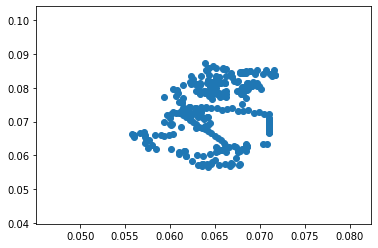

In [33]:
plt.scatter(merged.iloc[:, 1], merged.iloc[:, 0])

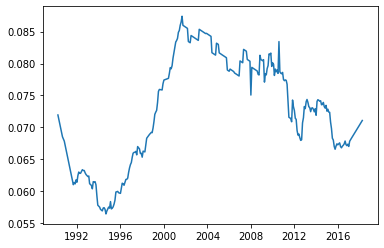

In [31]:
plt.plot(merged.iloc[:, 0])